In [31]:
import pandas as pd
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import itertools
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score,confusion_matrix, accuracy_score, make_scorer, f1_score,precision_score,recall_score, plot_confusion_matrix
import seaborn as sns

In [32]:
data = pd.read_csv("wine_quality.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


## Divisão de base de dados e separação de base

In [33]:
#attributes = data[["fixed.acidity","volatile.acidity","citric.acid","residual.sugar","chlorides","free.sulfur.dioxide","total.sulfur.dioxide","density","pH","sulphates","alcohol"]]
#quality = data[["quality"]]
X = data.iloc[:, 0:11].values
y = data.iloc[:, 11].values

In [34]:
labelencoder = LabelEncoder()
quality = labelencoder.fit_transform(y)
y_dummy = np_utils.to_categorical(y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y_dummy, test_size=0.1, random_state=199)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=199)

In [36]:
classifier = Sequential()
classifier.add(Dense(units=16, activation="linear",input_dim=11))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=16, activation="linear"))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=10, activation="softmax"))
classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])
history = classifier.fit(X_train, y_train, batch_size=32,
                  epochs=50,validation_split=0.1)

Epoch 1/50
148/148 [==============================] - 1s 3ms/step - loss: 19.5171 - categorical_accuracy: 0.2566 - val_loss: 4.3858 - val_categorical_accuracy: 0.4402
Epoch 2/50
148/148 [==============================] - 0s 2ms/step - loss: 6.7189 - categorical_accuracy: 0.3151 - val_loss: 2.3936 - val_categorical_accuracy: 0.4497
Epoch 3/50
148/148 [==============================] - 0s 2ms/step - loss: 4.0068 - categorical_accuracy: 0.3436 - val_loss: 2.1282 - val_categorical_accuracy: 0.4497
Epoch 4/50
148/148 [==============================] - 0s 2ms/step - loss: 2.9859 - categorical_accuracy: 0.3423 - val_loss: 1.5995 - val_categorical_accuracy: 0.4307
Epoch 5/50
148/148 [==============================] - 0s 2ms/step - loss: 2.3990 - categorical_accuracy: 0.3485 - val_loss: 1.4986 - val_categorical_accuracy: 0.4497
Epoch 6/50
148/148 [==============================] - 0s 2ms/step - loss: 2.1518 - categorical_accuracy: 0.3542 - val_loss: 1.4431 - val_categorical_accuracy: 0.4497
Epo

148/148 [==============================] - 0s 2ms/step - loss: 1.1507 - categorical_accuracy: 0.4957 - val_loss: 1.1439 - val_categorical_accuracy: 0.5256


In [47]:
predicted_y = classifier.predict(X_test)

y_test_transform = [np.argmax(t) for t in y_test]
predicted_y_transform = [np.argmax(t) for t in predicted_y]

matrix = confusion_matrix(predicted_y_transform, y_test_transform)

In [48]:
print(classification_report(y_test_transform, predicted_y_transform))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        19
           5       0.57      0.50      0.53       219
           6       0.48      0.75      0.58       275
           7       0.48      0.11      0.17       113
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00         2

    accuracy                           0.50       650
   macro avg       0.22      0.19      0.18       650
weighted avg       0.48      0.50      0.46       650



C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
le = preprocessing.LabelEncoder()
y_test_dummy = le.fit_transform(y_test_transform)
predicted_y_dummy = le.fit_transform(predicted_y_transform)
y_test_dummy = np_utils.to_categorical(y_test_dummy)
predicted_y_dummy = np_utils.to_categorical(predicted_y_dummy)

In [50]:
roc = roc_auc_score(y_test_dummy,predicted_y_dummy,multi_class="ovo",average = 'macro')
acc = accuracy_score(y_test_transform,predicted_y_transform)
precision = precision_score(y_test_transform,predicted_y_transform, average = "macro")
f1 = f1_score(y_test_transform,predicted_y_transform, average = "macro")
recall = recall_score(y_test_transform,predicted_y_transform, average = "macro")

print(">acc=%.4f,>prec=%.4f,>f1=%.4f,>rec=%.4f,roc=%.4f" % (acc,precision,f1,recall,roc))
# print(">acc=%.3f,>prec=%.3f,>f1=%.3f,>rec=%.3f" % (acc,precision,f1,recall))

>acc=0.5031,>prec=0.2175,>f1=0.1839,>rec=0.1934,roc=0.3990


C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization
[[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0  11 110  60  11   2   0]
 [  1   8 109 205  90  16   2]
 [  0   0   0  10  12   3   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


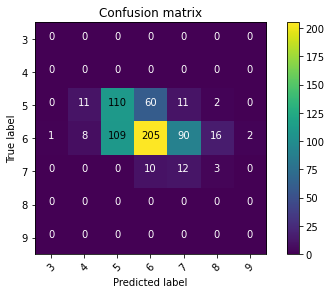

In [62]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.viridis):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else '.0f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(matrix,["3","4","5","6","7","8","9"])
plt.savefig('MC_MLP_Simples.png', transparent=True, dpi=300, bbox_inches="tight")